## Stock Market Prediction using Numerical and Textual Analysis




### Import libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import altair as alt

# import statsmodels.api as sm 

import yfinance as yf

import tensorflow as tf
from tensorflow import keras
import keras_tuner
# from kerastuner.tuners import RandomSearch

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Collecting data from yahoo finance

#train data
bse_data=yf.download('^BSESN', start='2016-01-04', end='2020-07-30')

[*********************100%***********************]  1 of 1 completed


In [3]:
# The shape of bse data

bse_data.shape

(1122, 6)

In [4]:
# read data

bse_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,26116.519531,26116.519531,25596.570312,25623.349609,25623.349609,9100
2016-01-05,25744.699219,25766.759766,25513.750000,25580.339844,25580.339844,10300
2016-01-06,25628.230469,25632.570312,25357.699219,25406.330078,25406.330078,13400
2016-01-07,25224.699219,25230.349609,24825.699219,24851.830078,24851.830078,11800
2016-01-08,24969.019531,25083.550781,24887.220703,24934.330078,24934.330078,15900
...,...,...,...,...,...,...
2020-07-23,37814.921875,38225.031250,37738.589844,38140.468750,38140.468750,19600
2020-07-24,37949.589844,38235.730469,37748.410156,38128.898438,38128.898438,19900
2020-07-27,38275.339844,38275.339844,37769.441406,37934.730469,37934.730469,18600


In [5]:
# Check total Columns

bse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
# rename the bse_data columns name


bse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 
                         'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [7]:
# read dataset

bse_data

,open,high,low,close,adjclose,volume
Date,,,,,,
2016-01-04,26116.519531,26116.519531,25596.570312,25623.349609,25623.349609,9100
2016-01-05,25744.699219,25766.759766,25513.750000,25580.339844,25580.339844,10300
2016-01-06,25628.230469,25632.570312,25357.699219,25406.330078,25406.330078,13400
2016-01-07,25224.699219,25230.349609,24825.699219,24851.830078,24851.830078,11800
2016-01-08,24969.019531,25083.550781,24887.220703,24934.330078,24934.330078,15900
...,...,...,...,...,...,...
2020-07-23,37814.921875,38225.031250,37738.589844,38140.468750,38140.468750,19600
2020-07-24,37949.589844,38235.730469,37748.410156,38128.898438,38128.898438,19900
2020-07-27,38275.339844,38275.339844,37769.441406,37934.730469,37934.730469,18600


In [8]:
# checking for missing values, size, datatypes etc

bse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1122 entries, 2016-01-04 to 2020-07-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1122 non-null   float64
 1   high      1122 non-null   float64
 2   low       1122 non-null   float64
 3   close     1122 non-null   float64
 4   adjclose  1122 non-null   float64
 5   volume    1122 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 61.4 KB


In [9]:
bse_data = bse_data[['close']]
bse_data

,close
Date,
2016-01-04,25623.349609
2016-01-05,25580.339844
2016-01-06,25406.330078
2016-01-07,24851.830078
2016-01-08,24934.330078
...,...
2020-07-23,38140.468750
2020-07-24,38128.898438
2020-07-27,37934.730469


### Visulization

<AxesSubplot:xlabel='Date', ylabel='close'>

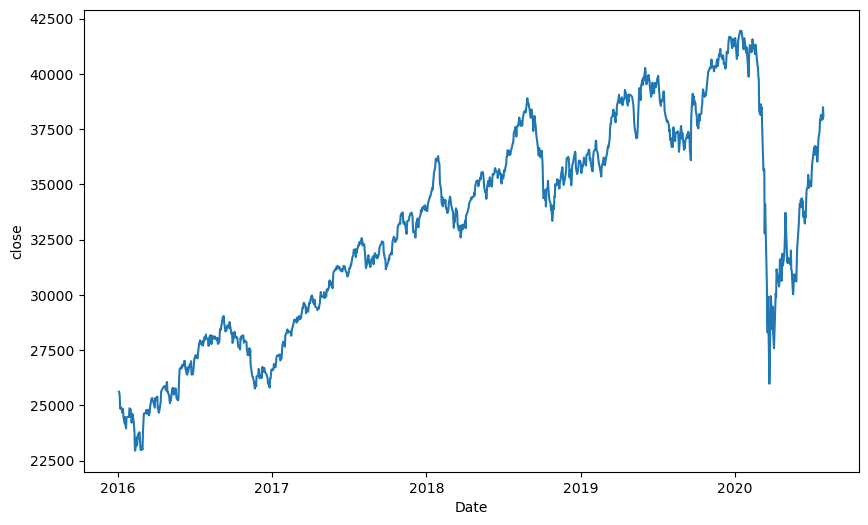

In [10]:
#Plotting the closing price

index = bse_data.index

plt.figure(figsize = (10,6))
sns.lineplot(x = index, y = bse_data['close'])

### Data Preprocessing

In [11]:
# Scaling the data

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(bse_data)

In [12]:
scaled_data

array([[0.14060038],
       [0.1383368 ],
       [0.12917878],
       ...,
       [0.78854055],
       [0.81791925],
       [0.79571912]])

In [13]:
#Splitting the data 

train_size = 0.80
len_train_data = round(len(bse_data) * train_size)

train_data = scaled_data[0 : len_train_data]
test_data = scaled_data[len_train_data :]



In [14]:
# The shape of training data and testing data

train_data.shape, test_data.shape

((898, 1), (224, 1))

In [15]:
#Creating features for future prediction

#We will use past 90 days data to predict the present

def feature_extraction(data, start, end):
  X_train = []
  y_train=[]
  for i in range(start,end):
    X_train.append(data[i-50:i])
    y_train.append(data[i])
  return X_train, y_train

In [16]:
#Creating training data

X_train, y_train = feature_extraction(train_data, 50, len(train_data))

#creating testing data

X_test,y_test = feature_extraction(test_data, 50, len(test_data))

In [17]:
#Converting the list to numpy array

#Training data

X_train = np.array(X_train)
y_train = np.array(y_train)

#Testing data
X_test = np.array(X_test)
y_test = np.array(y_test)

In [18]:
print(f'The shape of X_train : {X_train.shape}')
print(f'The shape of y_train : {y_train.shape}')

print(f'The shape of X_test : {X_test.shape}')
print(f'The shape of y_test : {y_test.shape}')

The shape of X_train : (848, 50, 1)
The shape of y_train : (848, 1)
The shape of X_test : (174, 50, 1)
The shape of y_test : (174, 1)


In [19]:
# Creating X_train DataFrame

#In order to get the original value we should inverse transform the scaled data
# We inverse transform here because we will later use it for visualization

train_df = pd.DataFrame(scaler.inverse_transform(X_train.reshape(-1, 50)), 
                        index = np.arange(0, len(X_train)))
train_df['target'] = scaler.inverse_transform(y_train)
train_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
0,25623.349609,25580.339844,25406.330078,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,...,24242.980469,24606.990234,24646.480469,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469
1,25580.339844,25406.330078,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,...,24606.990234,24646.480469,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141
2,25406.330078,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,24479.839844,...,24646.480469,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141,24952.740234
3,24851.830078,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,24479.839844,24062.039063,...,24659.230469,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141,24952.740234,25285.369141
4,24934.330078,24825.039062,24682.029297,24854.109375,24772.970703,24455.039062,24188.369141,24479.839844,24062.039063,23962.210937,...,24793.960938,24623.339844,24717.990234,24804.279297,24551.169922,24682.480469,24677.369141,24952.740234,25285.369141,25330.490234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,39784.519531,39950.460937,39756.808594,39741.359375,39452.070312,38960.789062,39046.339844,39112.738281,39601.628906,39194.488281,...,36976.851562,36690.500000,37327.359375,37581.910156,36958.160156,37311.531250,37350.328125,37402.488281,37328.011719,37060.371094
844,39950.460937,39756.808594,39741.359375,39452.070312,38960.789062,39046.339844,39112.738281,39601.628906,39194.488281,39122.960938,...,36690.500000,37327.359375,37581.910156,36958.160156,37311.531250,37350.328125,37402.488281,37328.011719,37060.371094,36472.929688
845,39756.808594,39741.359375,39452.070312,38960.789062,39046.339844,39112.738281,39601.628906,39194.488281,39122.960938,39434.941406,...,37327.359375,37581.910156,36958.160156,37311.531250,37350.328125,37402.488281,37328.011719,37060.371094,36472.929688,36701.160156
846,39741.359375,39452.070312,38960.789062,39046.339844,39112.738281,39601.628906,39194.488281,39122.960938,39434.941406,39592.078125,...,37581.910156,36958.160156,37311.531250,37350.328125,37402.488281,37328.011719,37060.371094,36472.929688,36701.160156,37494.121094


In [20]:
# Creating X test DataFrame

test_df = pd.DataFrame(scaler.inverse_transform(X_test.reshape(-1, 50)),
                       index = np.arange(len(X_train), len(X_train) + len(X_test)))
test_df['target'] = scaler.inverse_transform(y_test)
test_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
848,37451.839844,37068.929688,37332.789062,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,...,40165.031250,40301.960938,40248.230469,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406
849,37068.929688,37332.789062,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,...,40301.960938,40248.230469,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406
850,37332.789062,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,37123.308594,...,40248.230469,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406,40469.699219
851,36562.910156,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,37123.308594,36481.089844,...,40469.781250,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406,40469.699219,40651.640625
852,36724.738281,36644.421875,36981.769531,37145.449219,37270.820312,37104.281250,37384.988281,37123.308594,36481.089844,36563.878906,...,40653.738281,40323.609375,40345.078125,40116.058594,40286.480469,40356.691406,40284.191406,40469.699219,40651.640625,40575.171875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,32008.609375,31122.890625,31097.730469,30028.980469,30196.169922,30818.609375,30932.900391,30672.589844,30609.300781,31605.220703,...,36594.328125,36693.691406,36033.058594,36051.808594,36471.679688,37020.140625,37418.988281,37930.328125,37871.519531,38140.468750
1018,31122.890625,31097.730469,30028.980469,30196.169922,30818.609375,30932.900391,30672.589844,30609.300781,31605.220703,32200.589844,...,36693.691406,36033.058594,36051.808594,36471.679688,37020.140625,37418.988281,37930.328125,37871.519531,38140.468750,38128.898438
1019,31097.730469,30028.980469,30196.169922,30818.609375,30932.900391,30672.589844,30609.300781,31605.220703,32200.589844,32424.099609,...,36033.058594,36051.808594,36471.679688,37020.140625,37418.988281,37930.328125,37871.519531,38140.468750,38128.898438,37934.730469
1020,30028.980469,30196.169922,30818.609375,30932.900391,30672.589844,30609.300781,31605.220703,32200.589844,32424.099609,33303.519531,...,36051.808594,36471.679688,37020.140625,37418.988281,37930.328125,37871.519531,38140.468750,38128.898438,37934.730469,38492.949219


### Building model

In [21]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units = 384, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(keras.layers.LSTM(units = 384, return_sequences = True))
model.add(keras.layers.LSTM(units = 384, return_sequences = True))
model.add(keras.layers.LSTM(units = 384, return_sequences = False))
model.add(keras.layers.Dense(units = 1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 384)           592896    
                                                                 
 lstm_1 (LSTM)               (None, 50, 384)           1181184   
                                                                 
 lstm_2 (LSTM)               (None, 50, 384)           1181184   
                                                                 
 lstm_3 (LSTM)               (None, 384)               1181184   
                                                                 
 dense (Dense)               (None, 1)                 385       
                                                                 
Total params: 4,136,833
Trainable params: 4,136,833
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer = 'adam', loss = 'mse')
callback_chk = keras.callbacks.ModelCheckpoint(filepath = 'best_model.h5', save_best_only = True)
model_history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_test, y_test), callbacks = [callback_chk])

Epoch 1/30
27/27 [==============================] - 39s 1s/step - loss: 0.0258 - val_loss: 0.0319
Epoch 2/30
27/27 [==============================] - 31s 1s/step - loss: 0.0024 - val_loss: 0.0218
Epoch 3/30
27/27 [==============================] - 31s 1s/step - loss: 0.0018 - val_loss: 0.0167
Epoch 4/30
27/27 [==============================] - 31s 1s/step - loss: 0.0017 - val_loss: 0.0146
Epoch 5/30
27/27 [==============================] - 31s 1s/step - loss: 0.0013 - val_loss: 0.0119
Epoch 6/30
27/27 [==============================] - 31s 1s/step - loss: 0.0011 - val_loss: 0.0126
Epoch 7/30
27/27 [==============================] - 31s 1s/step - loss: 0.0012 - val_loss: 0.0096
Epoch 8/30
27/27 [==============================] - 31s 1s/step - loss: 0.0011 - val_loss: 0.0084
Epoch 9/30
27/27 [==============================] - 31s 1s/step - loss: 0.0012 - val_loss: 0.0078
Epoch 10/30
27/27 [==============================] - 29s 1s/step - loss: 0.0010 - val_loss: 0.0071
Epoch 11/30
27/27 [

In [23]:
model = keras.models.load_model('best_model.h5')

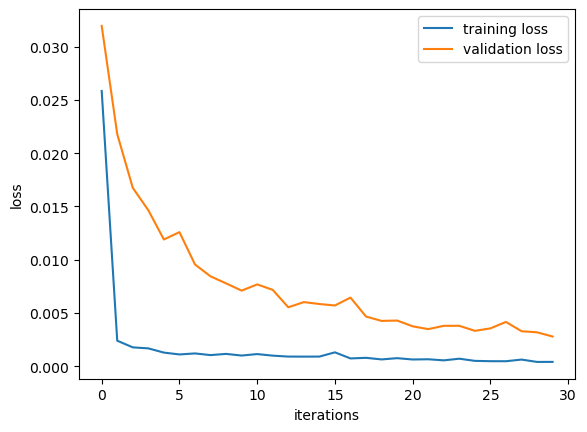

In [24]:
#Plotting the losses

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
index = np.arange(30)

sns.lineplot(x = index, y = loss)
sns.lineplot(x = index, y = val_loss)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.legend(['training loss','validation loss'])

### Making predictions

In [25]:
# lets try to predict with some data 

preds = model.predict(X_test)

6/6 [==============================] - 3s 302ms/step


In [26]:
#Performing inverse transformation on predictions and actual value

preds_inv = scaler.inverse_transform(preds)
y_test_inv = scaler.inverse_transform(y_test)

In [27]:
#evaluating the performance of the model

#MAE
print('MAE : ', mean_absolute_error(y_test_inv, preds_inv), end='\n')

#MSE
print('MSE : ', mean_squared_error(y_test_inv, preds_inv), end='\n')

#RMSE
print('RMSE : ', np.sqrt(mean_squared_error(y_test_inv, preds_inv)))

MAE :  798.5047481142242
MSE :  1008321.6858940782
RMSE :  1004.1522224713135


In [28]:
# R squared

r2_score(y_test_inv, preds_inv)

0.9498146018051268

### Graphical analysis

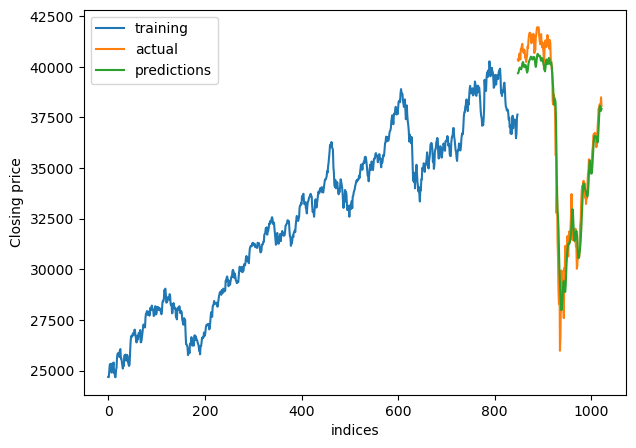

In [29]:
#Plotting the training data,testing data and predicted data

plt.figure(figsize = (7,5))
train_df['target'].plot()
test_df['target'].plot()

test_df['predictions'] = preds_inv
test_df['predictions'].plot()

plt.xlabel('indices')
plt.ylabel('Closing price')
plt.legend(['training','actual','predictions'])
plt.show()

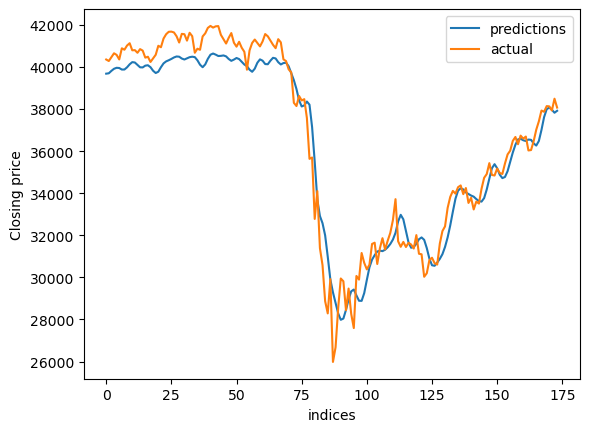

In [30]:
#Zooming the predictions portion

plt.plot(preds_inv)
plt.plot(y_test_inv)

plt.legend(['predictions','actual'])
plt.xlabel('indices')
plt.ylabel('Closing price')
plt.show()

### Textual analysis of news report

In [31]:
data_news = pd.read_csv('india-news-headlines.csv')

In [32]:
data_news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [33]:
#Converting the publish date data type to date time

data_news['Date'] = pd.to_datetime(data_news['publish_date'], format = '%Y%m%d')
data_news.drop(columns = 'publish_date', inplace = True)

In [34]:
data_news

,headline_category,headline_text,Date
0,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02
1,unknown,Fissures in Hurriyat over Pak visit,2001-01-02
2,unknown,America's unwanted heading for India?,2001-01-02
3,unknown,For bigwigs; it is destination Goa,2001-01-02
4,unknown,Extra buses to clear tourist traffic,2001-01-02
...,...,...,...
3650965,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...,2022-03-31
3650966,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...,2022-03-31
3650967,city.trichy,As Covid-19 cases drop to nil in southern dist...,2022-03-31
3650968,city.erode,Tamil Nadu sees marginal rise of Covid cases w...,2022-03-31


In [35]:
#How Textblob works

test = 'I am a not very good boy'
TextBlob(test).sentiment

Sentiment(polarity=-0.26923076923076916, subjectivity=0.46153846153846156)

In [36]:
#Fucntions to obtain polarity and subjectivity from the text

def polarity(text):
  pol_val = TextBlob(text).sentiment.polarity
  return pol_val
def subjectivity(text):
  sub_val = TextBlob(text).sentiment.subjectivity
  return sub_val

In [37]:
data_news['polarity'] = data_news['headline_text'].apply(polarity)
data_news['subjectivity'] = data_news['headline_text'].apply(subjectivity)

In [38]:
# Function for Sentiment analysis

def sentiment_analysis(polarity_val):
  if polarity_val > 0:
    senti_val = 'Positive'
  elif polarity_val == 0:
    senti_val = "Neutral"
  else:
    senti_val = 'Negative'
  return senti_val

In [39]:
data_news['Sentiment'] = data_news['polarity'].apply(sentiment_analysis)

In [40]:
data_news

,headline_category,headline_text,Date,polarity,subjectivity,Sentiment
0,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02,0.000000,0.000000,Neutral
1,unknown,Fissures in Hurriyat over Pak visit,2001-01-02,0.000000,0.000000,Neutral
2,unknown,America's unwanted heading for India?,2001-01-02,0.000000,0.000000,Neutral
3,unknown,For bigwigs; it is destination Goa,2001-01-02,0.000000,0.000000,Neutral
4,unknown,Extra buses to clear tourist traffic,2001-01-02,0.050000,0.241667,Positive
...,...,...,...,...,...,...
3650965,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...,2022-03-31,-0.125000,0.375000,Negative
3650966,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...,2022-03-31,0.100000,0.550000,Positive
3650967,city.trichy,As Covid-19 cases drop to nil in southern dist...,2022-03-31,0.000000,0.000000,Neutral
3650968,city.erode,Tamil Nadu sees marginal rise of Covid cases w...,2022-03-31,0.136364,0.454545,Positive


In [41]:
# Dropping duplicate rows

data_news.drop_duplicates(inplace = True)

In [42]:
data_news.reset_index(inplace = True)

In [43]:
data_news.drop(columns = 'index', inplace = True)

In [44]:
# Printing some Positive,Negative and Neutral text

#Positive

count = 0
for i in range(0, 50):
  if data_news['Sentiment'][i] == 'Positive':
    print(str(count) + "  " + data_news['headline_text'][i])
    count += 1

0  Extra buses to clear tourist traffic
1  Will Qureshi's return really help the govt?
2  Come to Nandi Hills...and you can fly
3  HAL approached for super jumbo project
4  The best music of the year
5  Planning Dept seeks Rs 350 crore more
6  More engg colleges if needed in state: Govt
7  Akki-Alur and Ranebennur peaceful


In [45]:
#Negtaive

count = 0
for i in range(0,50):
  if data_news['Sentiment'][i] == 'Negative':
    print(str(count) + "  " + data_news['headline_text'][i])
    count += 1

0  Destroying myths and doubts on sexuality


In [46]:
#Neutral

count = 0
for i in range(0,50):
  if data_news['Sentiment'][i] == 'Neutral':
    print(str(count) +"  " + data_news['headline_text'][i])
    count += 1

0  Status quo will not be disturbed at Ayodhya; says Vajpayee
1  Fissures in Hurriyat over Pak visit
2  America's unwanted heading for India?
3  For bigwigs; it is destination Goa
4  Dilute the power of transfers; says Riberio
5  Focus shifts to teaching of Hindi
6  IT will become compulsory in schools
7  Move to stop freedom fighters' pension flayed
8  Gilani claims he applied for passport 2 years ago
9  Parivar dismisses PM's warning
10  India; Pak exchange lists of N-plants
11  PM's tacit message: Put Ram tample on hold
12  Text of the Prime Minister's article
13  NCW to focus on violence against women
14  BBC's reality TV will focus on AIIMS
15  Jaitley firm on legal reforms
16  Hoshangabad farmers have enough water
17  BJP jumps into rail track conversion issue
18  State may take AP to court over Krishna
19  This official has sued the briber
20  Park turns temple compound as residents watch
21  Moves afoot to evict squatters in Urban dist
22  Mafia calls the shots in Gandhinagar t

Text(0, 0.5, 'Total values')

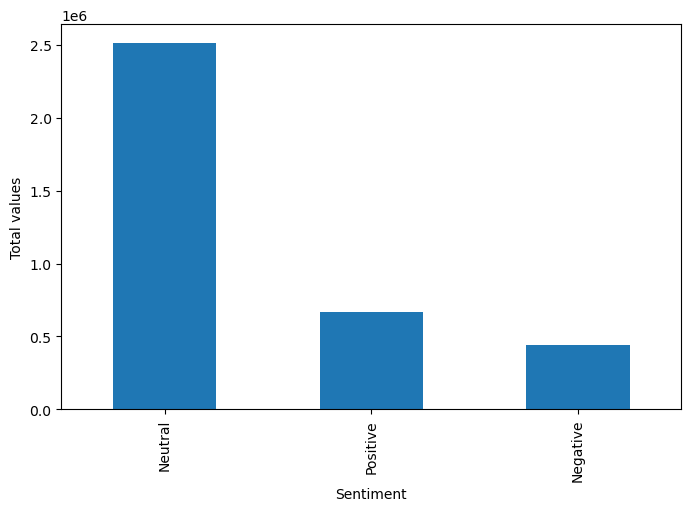

In [47]:
#Visualizing the number of Poitive,Negative and Neutral classes

plt.figure(figsize = (8,5))
data_news['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Total values')

In [48]:
# Merging the stocks dataframe and the news dataframe on date column

data_final = pd.merge(data_news, bse_data, on = "Date", how = 'right')

In [49]:
data_final

,headline_category,headline_text,Date,polarity,subjectivity,Sentiment,close
0,life-style.health-fitness.fitness,Surprising facts about exercise sweat,2016-01-04,0.700000,0.5,Positive,25623.349609
1,life-style.health-fitness.home-remedies,Bizarre home remedies for the common cold,2016-01-04,-0.166667,0.7,Negative,25623.349609
2,life-style.beauty,How to wear makeup when you're 30,2016-01-04,0.000000,0.0,Neutral,25623.349609
3,life-style.relationships.parenting,What's your style?,2016-01-04,0.000000,0.0,Neutral,25623.349609
4,life-style.relationships.man-woman,Bizarre reasons Indians cite for divorce,2016-01-04,0.400000,0.6,Positive,25623.349609
...,...,...,...,...,...,...,...
702348,city.delhi,AAP-BJP row over corpn taxes spills on to streets,2020-07-29,0.000000,0.0,Neutral,38071.128906
702349,city.delhi,Nearly 3L job seekers register on portal,2020-07-29,0.100000,0.4,Positive,38071.128906
702350,city.delhi,Covid Duty: Hotels Allowed To Check Out,2020-07-29,0.000000,0.0,Neutral,38071.128906
702351,city.nagpur,Cadasta Foundation; Waatavaran to secure fores...,2020-07-29,0.400000,0.6,Positive,38071.128906


In [50]:
# Grouping

data_final.groupby('Sentiment')['close'].mean()

Sentiment
Negative    32869.169796
Neutral     32593.562183
Positive    32649.965569
Name: close, dtype: float64

In [51]:
# Creting dummy variables for sentiment column

data_final = pd.get_dummies(data = data_final, columns = ['Sentiment'])

In [52]:
data_final.head()

,headline_category,headline_text,Date,polarity,subjectivity,close,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
0,life-style.health-fitness.fitness,Surprising facts about exercise sweat,2016-01-04,0.700000,0.5,25623.349609,0,0,1
1,life-style.health-fitness.home-remedies,Bizarre home remedies for the common cold,2016-01-04,-0.166667,0.7,25623.349609,1,0,0
2,life-style.beauty,How to wear makeup when you're 30,2016-01-04,0.000000,0.0,25623.349609,0,1,0
3,life-style.relationships.parenting,What's your style?,2016-01-04,0.000000,0.0,25623.349609,0,1,0
4,life-style.relationships.man-woman,Bizarre reasons Indians cite for divorce,2016-01-04,0.400000,0.6,25623.349609,0,0,1


<AxesSubplot:>

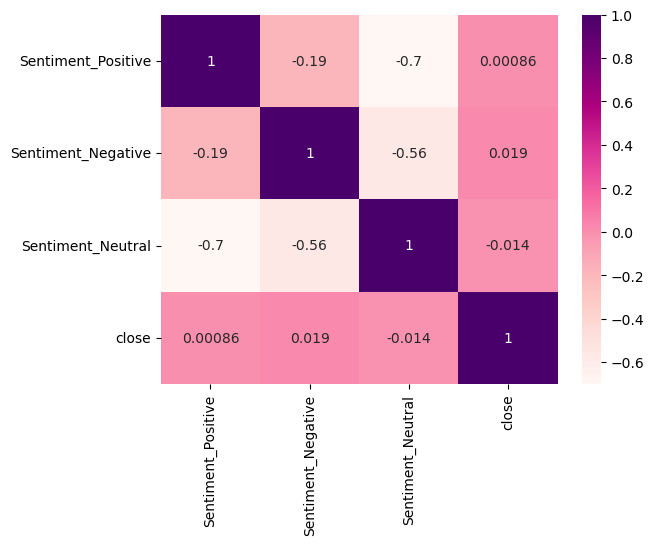

In [54]:
# Plotting Correlation  Matrix

corr_data = data_final[['Sentiment_Positive','Sentiment_Negative','Sentiment_Neutral','close']].corr()
sns.heatmap(corr_data, annot = True, cmap = 'RdPu')

### Conclusion

***We can finally conclude that the Stock prices are somewhat negatively correlated with the sentiment of the news headlines***